# RDKit library and Cheminformatics Concepts

#### Dr. Mohamed Marzouk Sobaih, Postdoctoral Researcher
#### [Twitter](https://twitter.com/mohamedmarzouk2) | [GitHub](https://github.com/momarzouksobeh) | [GoogleScholar](https://scholar.google.com/citations?hl=en&user=OWIaK9sAAAAJ) | [Website](https://momarzouksobeh.github.io) | [LinkedIn](http://www.linkedin.com/in/momarzouksobeh/)

# Table of Content 
- [1 - Introduction ](#intro)
    - [ 1.1 What will we cover in this tutorial? ](#tutorial_imp)
    - [ 1.2 Load the required libraries ](#import)

    - [ 1.3 What is the version of RDKit used in this tutorial ? ](#rdkit_version)

- [2 - Molecular Representations: SMILES ](#smiles)
    - [ 2.1 What is SMILES?](#what_smile)

    - [ 2.2 SMILES five basic syntax rules ](#smiles_rules)
    - [ 2.3 Guess the SMILES strings for molecules ](#guess_smiles)
- [3 - Creating molecules by RDKit using SMILES](#molecules_by_smiles)
    - [ 3.1 Displaying a chemical structure](#display_structure)

    - [ 3.2 Structures and SMILES for marketed drugs](#drugs_smiles)
    - [ 3.3 Reading SMILES of Multiple Chemical Structures ](#multistructures_smiles)
    - [ 3.4 Display multiple chemical structures in a grid ](#display_multiple_structures)
    - [ 3.5 Canonical SMILES ](#canonical_smiles)
    
- [4 - Molecular Similarity : Substructure Searches](#substructure)
    - [ 4.1 Example 1 for substructure search ](#ex1_substructure)
    - [ 4.2 What is the SMARTS? ](#smarts)

    - [ 4.3 Example 2 for substructure search ](#ex2_substructure)
- [5 - Molecular Fingerprints ](#fingerprints)
    - [ 5.1 What is Molecular Fingerprints ? ](#def_fp)

    - [ 5.2 What are the most widely used Molecular Fingerprints ? ](#types_fp)
    - [ 5.3 Using RDKit to get the fingerprint ](#rdkit_fp)
    - [ 5.4 Using RDKit to check molecular similarity ](#similarity)
    
- [6 - RDKit and Molecular Descriptors](#descriptors)
    - [ 6.1 What are the key differences between fingerprints and molecular descriptors ? ](#diff_fingerprints_descriptors)
    
    - [ 6.2 List of molecular descriptors available on **RDKit** ](#RDKit_descriptors)
- [7 - Molecular Similarity and Substructure on Datasets](#similarity_datasets)
    - [ 7.1 Find similarity in datasets using fingerprints ](#similarity_fingerprints_datasets)
    
    - [ 7.2 Are Fingerprints Unique? ](#fingerprints_uniqueness)
    
- [ Key Resources Utilized in Crafting This Notebook ](#resources)



<a name="intro"></a>
## 1 - Introduction

<a name="tutorial_imp"></a>
### 1.1 What will we cover in this tutorial?

* This notebook aims to familiarize you with foundational concepts in **Cheminformatics** and guide you in initiating your work with the **RDKit** software.
    * [Cheminformatics](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics):  Involves the use of computational techniques, including machine learning and statistical methods, for managing, analyzing, and predicting chemical data and properties.
    * Cheminformatics techniques are used commonly in pharmaceutical and drug discovery applications.

    * [RDKit](https://en.wikipedia.org/wiki/RDKit) : One of the commonly used library in Python for data science (or cheminformatics). 
    * RDKit is an open-source cheminformatics library, primarily developed in C++, and was created by [Dr. Greg Landrum](https://scholar.google.com/citations?user=xr9paY0AAAAJ&hl=en) in 2006. 


<a name="import"></a>
### 1.2 Load the required libraries

In [1]:
import rdkit as rd
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
import requests

<a name="rdkit_version"></a>
### 1.3 What is the version of RDKit used in this tutorial ?

In [2]:
print("The version of RDKit is : ", rd.__version__)

The version of RDKit is :  2023.09.3


<a name="smiles"></a>
## 2 - Molecular Representations: SMILES

<a name="what_smile"></a>
### 2.1 What is SMILES?

* **SMILES** stands for "**S**implified **M**olecular-**I**nput **L**ine-**E**ntry **S**ystem" and is a way to represent molecules as a string of characters and can be used by the computer. 
* You do not need to worry about ambiguous representations because the software will automatically reorder your entry into a unique SMILES string when necessary.
* SMILES has five basic syntax rules which must be observed. 





<a name="smiles_rules"></a>
### 2.2 SMILES five basic syntax rules. 

* If basic rules of chemistry are not followed in SMILES entry, the system will warn the user and ask that the structure be edited or reentered. For example, if the user places too many bonds on an atom, a SMILES warning will appear that the structure is impossible.

#### Rule One: Atoms and Bonds

* SMILES supports all elements in the periodic table. 

* An atom is represented using its respective atomic symbol. 
* Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. 
* If the atomic symbol has more than one letter the second letter must be lower case.

> Bonds are denoted as shown below 


<!-- 
|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| CC     | CH3CH3  |     Ethane     |
| C=C	| CH2CH2	| Ethene |
| CBr	| CH3Br	| Bromomethane  |
| C#N	| C=N	| Hydrocyanic acid |
| Na.Cl	| NaCl	| Sodium chloride | -->


<center> 


|SMILE  | Bond Type |
|:-------------|:-----------|
| - |	Single bond  |
| = |	Double bond |
| # |	Triple bond
| * |	Aromatic bond |
| . |	Disconnected structures |

</center>

* Single bonds are the default and therefore need not be entered. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical ethane. 

* It is also assumed that the bond between two lower case atom symbols is aromatic. A blank terminates the SMILES string.

#### Rule Two: Simple Chains 

* By combining atomic symbols and bond symbols simple chain structures can be represented. 
* The structures that are entered using SMILES are hydrogen-suppressed; the molecules are represented without hydrogens. 
* The SMILES software understands the number of possible connections that an atom can have. 
* If enough bonds are not identified by the user through SMILES notation, the system will automatically assume that the other connections are satisfied by hydrogen bonds.

> **Some examples**:  

<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| CC     | CH3CH3  |     Ethane     |
| C=C	| CH2CH2	| Ethene |
| CBr	| CH3Br	| Bromomethane  |
| C#N	| C=N	| Hydrocyanic acid |
| Na.Cl	| NaCl	| Sodium chloride |

</center>

* The user can explicitly identify the hydrogen bonds, but if one hydrogen bond is identified in the string, the SMILES interpreter will assume that the user has identified all hydrogens for that molecule.

<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| HC(H)=C(H)(H)	| CH2CH2	| Ethene |

</center>


#### Rule Three: Branches

* A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. 

* **Some examples**:

<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| CC(O)C	|      CH3CHOHCH3   	|2-Propanol |
| CC(=O)C        |    CH3COCH3       |    2-Propanone        |
|    CC(CC)C      |  CH3CH2CH2CH3         |      2-Methylbutane      |
|   CC(C)CC(=O)       |  CH3CH2CH(CH3)CHO         |   2-Methylbutanal         |
|  c1c(N(=O)=O)cccc1        |    C6H5NO2       |  Nitrobenzene          |
|  CC(C)(C)CC        |   (CH3)2CHCH2CH3        |  2,2-Dimethylbutane          |

</center>



#### Rule Four: Rings

* SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. 
* For example, in C1CCCCC1, the first carbon has a number '1' which connects by a single bond with the last carbon which also has a number '1'. The resulting structure is cyclohexane. 
* Chemicals that have multiple rings may be identified by using different numbers for each ring. 
* If a double, single, or aromatic bond is used for the ring closure, the bond symbol is placed before the ring closure number. 

* **Some examples**: 

<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
|	C=1CCCCC1 |	C6H10  | Cyclohexene |   
| c1ccccc1	| C6H6	| Benzene |
| C1OC1CC	| CH3CHOCH2CH3	| Ethyloxirane |

</center>


#### Rule Five: Charged Atoms

* Charges on an atom can be used to override the knowledge regarding valence that is built into SMILES software. 
* The format for identifying a charged atom Positive and negative charges are included by adding "+" or "-" in square brackets with the atom type.
* The number of charges may be explicitly stated ({-1}) or not ({-}). For example:


<center>

 |SMILE  | Or |Formula | Name |
|:-------------|:-----------|-------| -------|
|	CCC(=O)O{-1} |	CCC(=O)O{-} | CH3CH2COOH |  Ionized form of propanoic acid  |
|c1ccccn{+1}1CC(=O)O	| - 	| - | 1-Carboxylmethyl pyridinium |

</center>

#### Note that : 

Most of the time, you will not need to write a SMILES string by hand. You will be able to look up a molecule's SMILES string from a web database like [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

You can also use tools like this [molecule sketcher](https://pubchem.ncbi.nlm.nih.gov//edit3/index.html) to draw molecules and get their SMILES strings.

<a name="guess_smiles"></a>
### 2.3 Guess the SMILES strings for molecules    

Complete the following table : 

<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| ?    | CH₃CH₂OH  |     Ethanol     |
| ?	| H₂O	| Water |
| O=C=O	| ?	| ? |
| CC(C(=O)O)N	| ?| Alanine |
|N=C(N)NCCC(NC(=N)N)C(=O)O|?|Arginine|
|CC1=CN=C(N=CN1)C=O|?|Thymine|




</center>

<details>
  <summary><font size="3" color="darkred"><b> Check the answer </b></font></summary>

```
<center>

|SMILE  | Formula | Name |
|:-------------|:-----------|-------|
| CCO    | CH₃CH₂OH  |     Ethanol     |
| O	| H₂O	| Water |
| O=C=O	| CO₂	| Carbon Dioxide  |
| CC(C(=O)O)N	| CH3CH(NH2)COOH	| Alanine |
|N=C(N)NCCC(NC(=N)N)C(=O)O|C6H14N4O2|Arginine|
|CC1=CN=C(N=CN1)C=O|C5H6N2O2|Thymine|


</center>


```

<a name="molecules_by_smiles"></a>
## 3 - Creating molecules by RDKit using SMILES

* To get information about molecules in RDKit, we have to first create variables representing molecules.
* RDKit has molecule object that can be used to retrieve information or calculate properties.
* The molecule name has to be communicated to RDKit in a way that computers understand, so that we will use SMILES. 
* Now we will use SMILES strings to create molecule objects in RDKit. 

<a name="display_structure"></a>
### 3.1 Displaying a chemical structure

* We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.


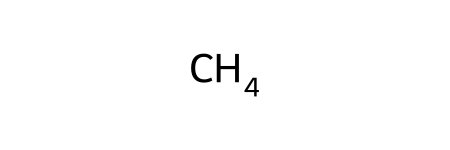

In [3]:
methane = Chem.MolFromSmiles("C")
methane

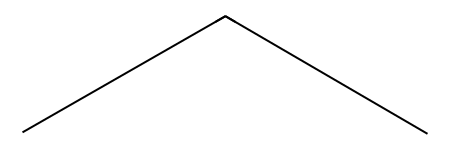

In [4]:
propane = Chem.MolFromSmiles("CCC")
propane

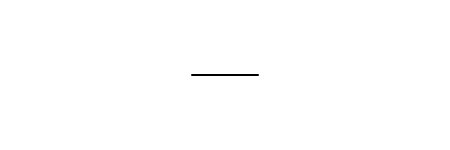

In [5]:
ethene = Chem.MolFromSmiles("CC")
ethene

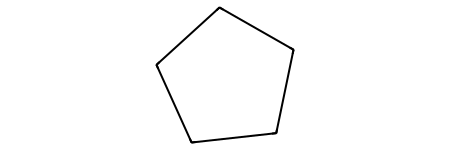

In [6]:
Cyclohexane = Chem.MolFromSmiles("C1CCCC1")
Cyclohexane

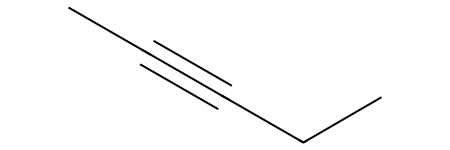

In [7]:
pentyne = Chem.MolFromSmiles("CC#CCC")
pentyne

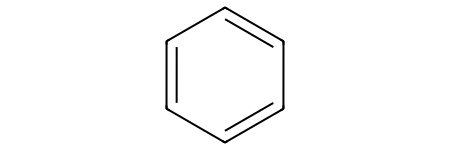

In [8]:
Benzene = Chem.MolFromSmiles("c1ccccc1")
Benzene

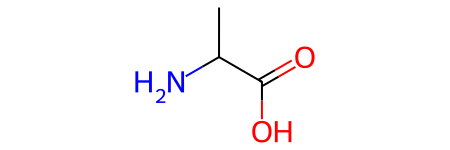

In [9]:
Alanine = Chem.MolFromSmiles("CC(C(=O)O)N")
Alanine

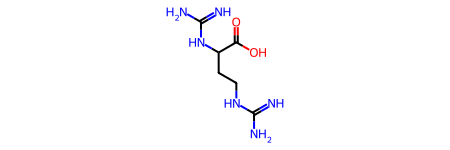

In [10]:
Arginine = Chem.MolFromSmiles("N=C(N)NCCC(NC(=N)N)C(=O)O")
Arginine

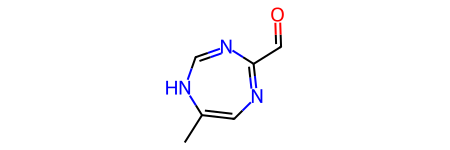

In [11]:
Thymine = Chem.MolFromSmiles("CC1=CN=C(N=CN1)C=O")
Thymine

#### Examples for charged molecules 

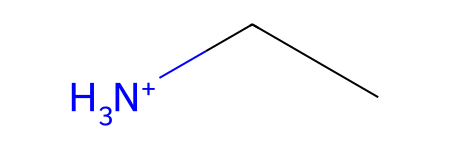

In [12]:
ethylamine = Chem.MolFromSmiles("CC[NH3+]")
ethylamine

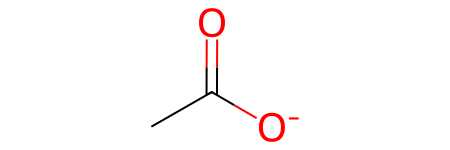

In [13]:
acetate = Chem.MolFromSmiles("CC(=O)[O-]")
acetate

#### Disconnected Structures

* In some cases, a molecule may contain multiple entities that are not connected by a covalent bond.  
* In SMILES, the two entities are represented as two SMILES separated by a ".".  
* For instance, let's look at acetate with a sodium salt.  
* The positioning of the sodium salt in the depiction isn't ideal but the SMILES is valid. 

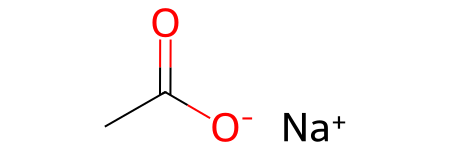

In [14]:
acetate_salt = Chem.MolFromSmiles("CC(=O)[O-].[Na+]")
acetate_salt

<a name="drugs_smiles"></a>
### 3.2 Structures and SMILES for marketed drugs


* The SMILES representations for most marketed drugs are available from the Wikipedia page for the corresponding drug.  
* For instance, we can get the SMILES for some drugs : 

#### A ) Imatinib (Gleevec) [Wikipedia](https://en.wikipedia.org/wiki/Imatinib).
 * Imatinib is commonly used in the treatment of certain types of cancer
 * Imatinib is a tyrosine kinase inhibitor that targets specific proteins involved in the abnormal growth of cancer cells.
 * With this SMILES string in hand, we can generate an RDKit molecule.

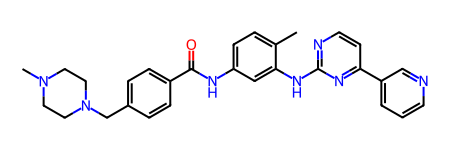

In [15]:
glvc = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")
glvc

#### B ) Paclitaxel
* Used to treat various types of cancer

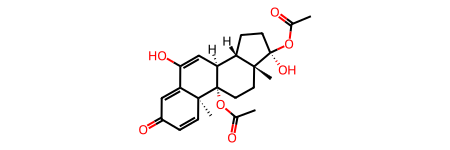

In [16]:
Paclitaxel = Chem.MolFromSmiles("CC(=O)O[C@@]1(CC[C@@H]2[C@]1(CC[C@@]3([C@H]2C=C(C4=CC(=O)C=C[C@]34C)O)OC(=O)C)C)O") 
Paclitaxel

#### C ) Rituximab
* Used for certain types of non-Hodgkin lymphoma

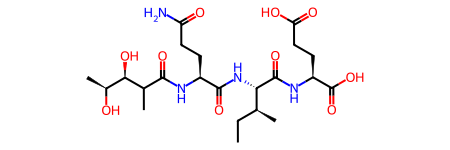

In [17]:
Rituximab = Chem.MolFromSmiles("CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)N)NC(=O)C(C)[C@H](O)[C@H](C)O)C(=O)N[C@@H](CCC(=O)O)C(=O)O") 
Rituximab

#### D ) Bevacizumab
* Used for various cancers, including colorectal cancer and lung cancer

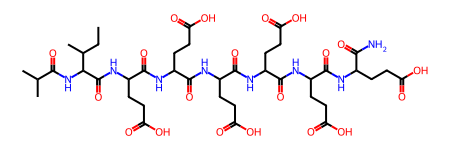

In [18]:
Bevacizumab = Chem.MolFromSmiles("CCC(C)C(C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)N)NC(=O)C(C)C") 
Bevacizumab

<a name="multistructures_smiles"></a>
### 3.3 Reading SMILES of Multiple Chemical Structures 

#### A ) Just three or few structures

* In order to look at more than one example, we'll put the SMILES and the names of the associated molecules into a text buffer. 

In [19]:
# define a text buffer for our examples
examples = """C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid"""
# not that we use the second argumen to split to only return two tokens
smiles_list = [x.split(" ",1) for x in examples.split("\n")]

In [20]:
smiles_list

[['C(C)(C)O', 'isopropanol'],
 ['C(Cl)(Cl)(Cl)Cl', 'carbon tetrachloride'],
 ['CC(=O)O', 'acetic acid']]

> In order to make our lives a little easier, we're going to define a function that will use the MolsToGridImage function from the  RDKit to display multiple structures. 

In [21]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    name_list = []
    for smiles, name in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
        name_list.append(name)
    return MolsToGridImage(mol_list,legends=name_list,molsPerRow=4)

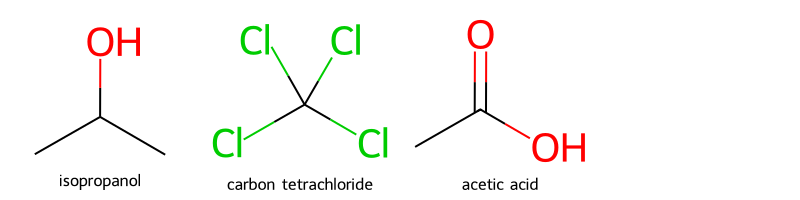

In [22]:
display_structures(smiles_list)

#### B ) Many molecules in SD files formate

* The RDKit also provides the ability to read molecules from common molecular structure formats.  
* In the code below we use the RDKit's [SDMolSupplier](https://www.rdkit.org/docs/cppapi/classRDKit_1_1SDMolSupplier.html) to read molecules from an [SD file](https://en.wikipedia.org/wiki/Chemical_table_file). 
* First, we'll download the file from GitHub. 

In [23]:
url = "https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/example_compounds.sdf"
r = requests.get(url)
bytes_written = open('example_compounds.sdf', 'w').write(r.text)

> Let's read the file 

In [24]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]
mols

This code reads the molecules into a list. We will see how to display multiple chemical structures.  

<a name="display_multiple_structures"></a>
### 3.4 Display multiple chemical structures in a grid 

#### A) RDKit's built-in Method : **MolsToGridImage**
* It provides a convenient way of displaying a grid of structures. 

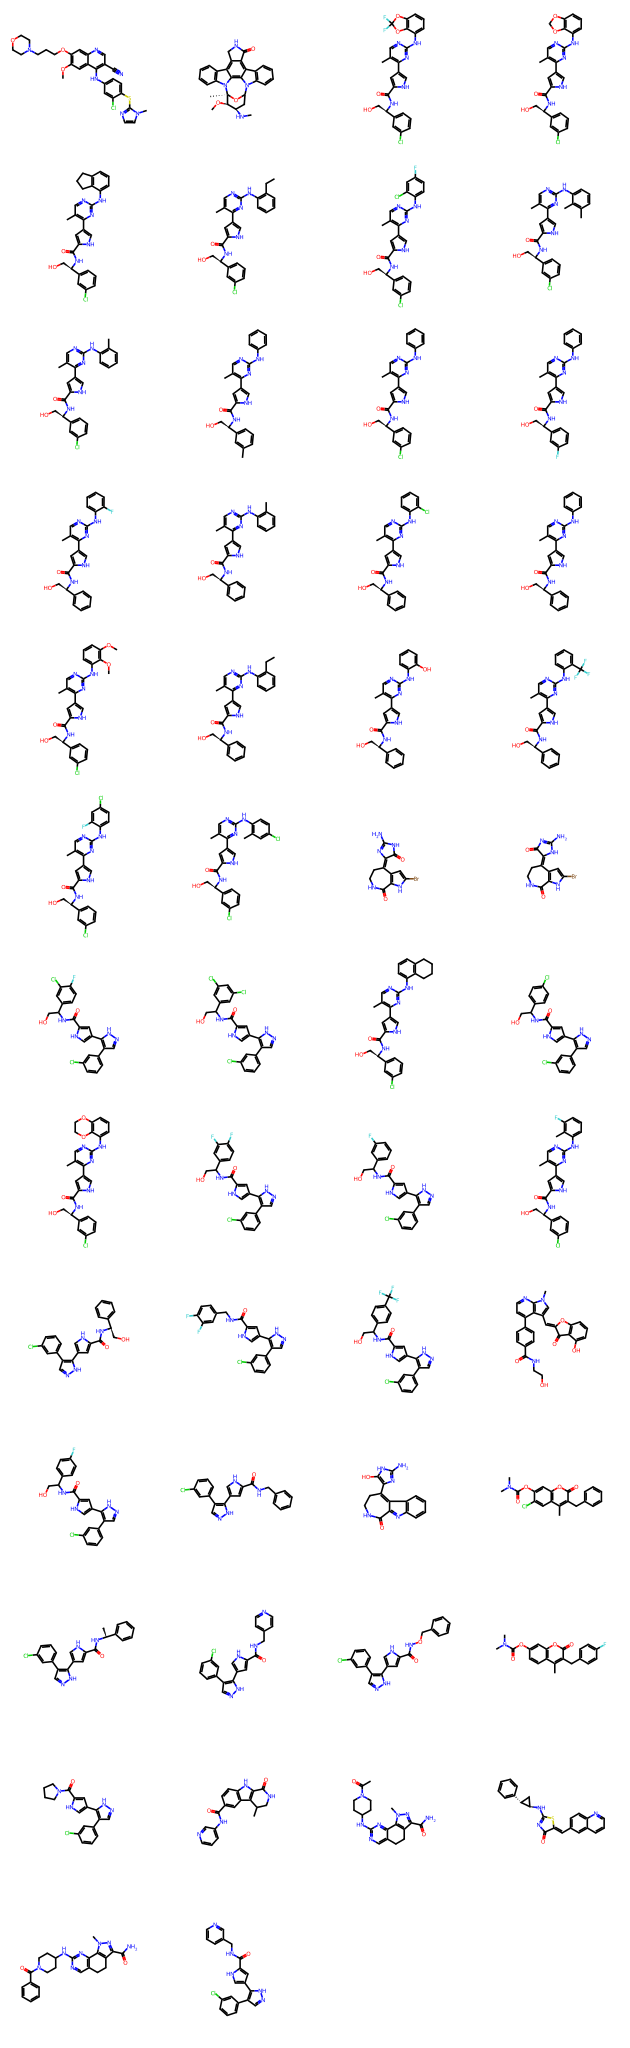

In [67]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

#### B) Another Python Library : **mols2grid**

* The [mols2grid](https://github.com/cbouy/mols2grid) Python library can be used to generate a more flexible grid view that also allows selections. 

In [26]:
mols2grid.display(mols)

MolGridWidget()

In [27]:
mols2grid.get_selection()

{}

#### C) Practice by your self  

Write the SMILES and display a table of chemical structures for the following. If you don't know the structures, google the names. 

1. 2-menthylpentene    
2. isopropanal          
3. 2-pentyn-1-ol           
4. 1,2,2,3-tetrafluorobutane    
5. propanoic acid             
6. 2-t-butyl-3-hydroxy-propane        


<details>
  <summary><font size="3" color="darkred"><b> Check the answer </b></font></summary>

```
test_yourself = """CC(C)C1CCC(C(C)C1)C=C 2-menthylpentene
CC(C)O isopropanal 
CC#CCCO 2-pentyn-1-ol
C(CF)(CF)(CF)CF 1,2,2,3-tetrafluorobutane
CC(=O)O propanoic acid
CC(C)(C(C)(C)O)C 2-t-butyl-3-hydroxy-propane"""

smiles_list2 = [x.split(" ",1) for x in test_yourself.split("\n")]
display_structures(smiles_list2)


```
<img src="images/testurself_displaystructures.png"  width="600px">

#### D ) Using the RDKit With Pandas Dataframes
* We can also read an SD file into a [Pandas](https://pandas.pydata.org/) dataframe.  
* The Pandas dataframe holds data in a grid data structure that can be seen as similar to a spreadsheet. 

In [28]:
df = PandasTools.LoadSDF("example_compounds.sdf")

* We can use mols2grid to display the dataframe.
* **Note that** : we need to specify the column that contains the RDKit molecule. 
* When the RDKit reads an SD file, the molecule is placed in the ROMol column.

In [29]:
mols2grid.display(df,mol_col="ROMol")

MolGridWidget()

#### D ) Using Pandas Dataframe options to adding more properties
Let's add columns with molecular weight and LogP to the dataframe.

In [30]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

* We can use mols2grid to display the dataframe with the newly added data. 
* We can use the **subset** variable to indicate which dataframe columns to display.  
* **Note that** : 
    * The structure image is specified by the **"img"** column. 
    * The **transform** variable can be used to specify the number of decimal places to display for the MW and LogP columns. 
    * The **transform** variable accepts a dictionary of column names mapped to formatting functions.

In [31]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP"],transform={"MW" : two_decimals, "LogP": two_decimals})

MolGridWidget()

#### E ) Plotting Property Data from dataframe 

* It's easy to access the data in the dataframe and use it to perform calculations and generate plots. 
* For instance, we can use a boxplot to examine the distribution of molecular weight within the dataframe.

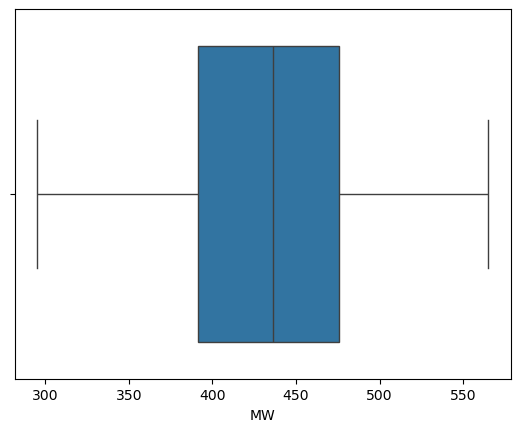

In [32]:
import seaborn as sns
ax = sns.boxplot(x=df.MW)

<a name="canonical_smiles"></a>
### 3.5 Canonical SMILES 
* There are many ways to write a SMILES for the same molecule. 
* For instance, in the cell below, we show five different ways to write the SMILES for pentane.

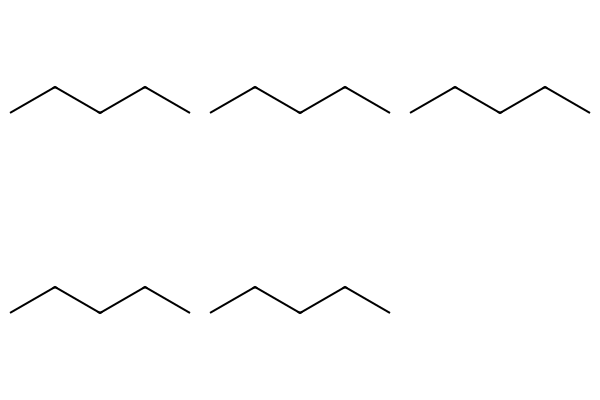

In [33]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
Chem.Draw.MolsToGridImage(pentane_mol_list)

* It's convenient to be able to write many SMILES for the same molecule, but this can also be a problem.  
* Let's say we're trying to keep track of the number of unique molecules in a set.  If the same molecule can have several SMILES, it can be difficult to keep track of which molecules are the same.  
* **Fortunately**, [the RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html) has methods for creating what is called a **canonical** representation.  
* These methods should always create the same SMILES for a molecule.  
* Here's an example where we create a canonical SMILES for the pentane_smiles_list above. 
* Note that all the input SMILES are different but all the output SMILES are the same.  
* It's important to know that all Cheminformatics toolkits do not generate the same canonical SMILES.

In [34]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
for mol in pentane_mol_list:
    pentane_smiles = Chem.MolToSmiles(mol)
    print(pentane_smiles)

CCCCC
CCCCC
CCCCC
CCCCC
CCCCC


<details>
  <summary><font size="3" color="darkred"><b> Double click to see another way to do it </b></font></summary>

```
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
for i in range(len(pentane_smiles_list)) :
        mol = Chem.MolFromSmiles(pentane_smiles_list[i])
        common_smiles = Chem.MolToSmiles(mol)
        print(common_smiles)
```
CCCCC
CCCCC
CCCCC
CCCCC
CCCCC

<a name="substructure"></a>
## 4 - Molecular Similarity : Substructure Searches

* Sometimes you may wish to search a set of molecules and identify molecules that have certain functional groups.
* In the language of graph representation, we would be looking for our molecule graph to contain a certain subgraph.

<a name="ex1_substructure"></a>
### 4.1 Example 1 for substructure search

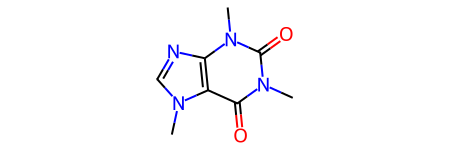

In [35]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine

* Let's say we are looking for only the **C=O** pattern in our target! 

In [36]:
o_pattern = Chem.MolFromSmiles("C=O")

* We can now see if our query matches ethyl benzene by using the **HasSubstructMatch** method of the ethyl_benzene molecule object.

In [37]:
caffeine.HasSubstructMatch(o_pattern)

True

* The value **True** above indicates that the caffeine molecule object does indeed contain the substructure specified by o_pattern. 
* We can use the function **GetSubstructMatch** to identify the specific atoms matching a pattern. 

In [38]:
matches = caffeine.GetSubstructMatches(o_pattern)
matches

((6, 7), (9, 10))

> One interesting side effect of the call to GetSubstructMatch above is that the depiction shows the selected atoms as highlighted. 

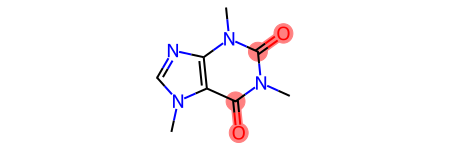

In [39]:

caffeine

<a name="smarts"></a>
### 4.2 What is the SMARTS? 

* The **SM**ILES **AR**bitrary **T**arget **S**pecification (SMARTS) is a language for pattern matching in molecules.  
* SMART patterns are used to specify molecular fragments or motifs with specific structural features. 
* These patterns are particularly useful in chemical searching, where one can define a query pattern and search a chemical database for compounds that match the specified substructure. 
* Like SMILES, SMARTS was developed and refined by [Dave Weininger](https://en.wikipedia.org/wiki/David_Weininger) and colleagues at Daylight Chemical Information Systems.  

* SMARTS Patterns:
   * SMART patterns are an extension of SMILES and are used to define specific substructure patterns within molecules.

   * They allow for the specification of chemical features such as atoms, bonds, and connectivity.
   * SMART patterns can include wildcards and logical operators, making them powerful for defining complex substructures.

* Applications of SMARTS 
   * SMART patterns are commonly used in cheminformatics tools and software for tasks such as virtual screening, lead optimization, and compound selection.
   
   * They play a role in medicinal chemistry, where researchers may want to identify compounds containing specific pharmacophores or substructures.

* SMARTS share a lot of the same syntax as SMILES but there are a number of critical differences.  At a simple level, any SMILES is also a valid SMARTS.  


<a name="ex2_substructure"></a>
### 4.3 Example 2 for substructure search 

* In the RDKit, we can parse a SMARTS and create a molecule with pattern matching abilities using the function **Chem.MolFromSmarts**.  
* If we look at the depicted structure below, we can see that there are aromatic bonds between the ring atoms
* These bond types are implicit since no bonds were specified.  
* The bond to the methyl carbon is also not specified, so it is of type **single or aromatic**.

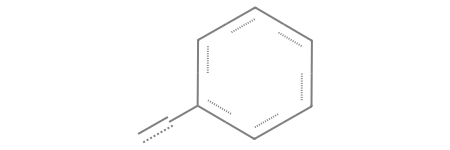

In [40]:
query_mol = Chem.MolFromSmarts("c1ccccc1C")
query_mol

> Now, let's create a molecule that we'll match.  
* We'll use ethylbenzene. Since this is a molecule, not a query for searching, we'll use **Chem.MolFromSmiles**. 

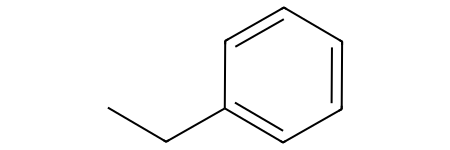

In [41]:
ethyl_benzene = Chem.MolFromSmiles("c1ccccc1CC")
ethyl_benzene

* We can now see if our query matches ethyl benzene by using the **HasSubstructMatch** method of the ethyl_benzene molecule object.

In [42]:
ethyl_benzene.HasSubstructMatch(query_mol)

True

* The value **True** above indicates that the ethyl_benzene molecule object does indeed contain the substructure specified by query_mol. 
* We can use the function **GetSubstructMatch** to identify the specific atoms matching a pattern. 
* The code below shows that the pattern specified by query_mol matches atoms 0,1,2,3,4,5 and 6.  

In [43]:
ethyl_benzene.GetSubstructMatch(query_mol)

(0, 1, 2, 3, 4, 5, 6)

* One interesting side effect of the call to GetSubstructMatch above is that the depiction shows the selected atoms as highlighted. 

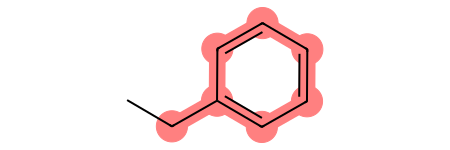

In [44]:
ethyl_benzene

<a name="fingerprints"></a>
## 5 -  Molecular Fingerprints

<a name="def_fp"></a>
### 5.1 What is Molecular Fingerprints ?

* Molecular fingerprints, also known as molecular descriptors or chemical fingerprints, are representations of chemical structures in a binary format( bit strings, or vectors of 0's and 1's).

* Fingerprints are built by considering the molecular structure (often as some sort of graph representation) and applying a certain algorithm to create the vector.

<center>
<img src="images/Topological_Fingerprint.png">
</center>

* Image from [Chemistry LibreTexts](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors)



* Molecular fingerprints are commonly used in cheminformatics and computational chemistry to encode structural information about molecules for various applications, such as similarity searching, virtual screening, and quantitative structure-activity relationship (QSAR) modeling.

<a name="types_fp"></a>
### 5.2 What are the most widely used Molecular Fingerprints ?

* There are various algorithms and methods for generating molecular fingerprints in cheminformatics. 
> Here are some of the most widely used algorithms:
* [**Daylight Fingerprint**](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) (FP2): 
    * The Daylight fingerprint is a path-based fingerprint. 
    * It represents the presence or absence of specific substructures (paths) in the molecule. 
    
    * The substructures are defined based on linear sequences of atoms.
    * The predefined substructures make it useful for identifying specific functional groups or chemical features.
    
* [**Morgan Fingerprint**](https://www.rdkit.org/docs/GettingStartedInPython.html#explaining-bits-from-fingerprints) or Extended Connectivity Fingerprint (ECFP): 
    * Circular fingerprint that encodes information about local connectivity patterns around each atom.
    
    * The circular neighborhoods are defined by a user-specified radius.
    * The key parameter is the radius, which defines the size of the circular neighborhoods around each atom. 
    * Different radii capture information at different levels of molecular detail.
    * Suitable for similarity searching, virtual screening, and quantitative structure-activity relationship (QSAR) modeling.
* [**MACCS Keys**]():
    * The Molecular ACCess System keys represent the presence or absence of predefined structural keys.
  

    * Captures the presence or absence of specific chemical features.
    * Often used for similarity searching and virtual screening.
* [**PubChem Fingerprint**]():
    * Binary fingerprint based on a set of predefined structural features.
    
    * Used in the PubChem database for chemical similarity searching.

* Atom Pairs Fingerprint:
Encodes the presence or absence of specific atom pairs in the molecule.
Captures local structural features.

* RDKit Fingerprint:
RDKit provides a generic fingerprint class that allows you to configure and generate fingerprints based on various methods, including Morgan fingerprints, Atom Pairs fingerprints, and others.


<a name="rdkit_fp"></a>
### 5.3 Using RDKit to get the fingerprint 

> Define the fingerprint generator with specific radius: 

In [45]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius=2)

> Define the molecules needed to get the fingerprint for 

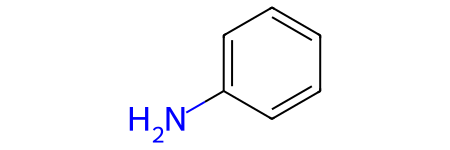

In [46]:
benzene = Chem.MolFromSmiles("c1ccccc1")
aniline = Chem.MolFromSmiles("Nc1ccccc1")
pyridine = Chem.MolFromSmiles("n1ccccc1")
# let's see one of them 
aniline 

> Get fingerprints for the molecules

In [47]:

benzene_fp = fpgen.GetFingerprint(benzene)
aniline_fp = fpgen.GetFingerprint(aniline)
pyridine_fp = fpgen.GetFingerprint(pyridine)
benzene_fp

RDKit will let us see the bitstring for each fingerprint:

In [48]:
benzene_fp.ToBitString()

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [49]:
pyridine_fp.ToBitString()

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100001000001000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

<a name="similarity"></a>
### 5.4 Using RDKit to check molecular similarity 

* Although comparing the bitstrings of two molecules and checking if they are identical is a simple way to determine if they are the same, the RDKit library offers a specific method for accomplishing this task.
> Let's check similarity first by comparing the bit strings 

In [50]:
benzene_fp.ToBitString() == pyridine_fp.ToBitString()

False

> Let's check similarity using the well prepared RDKit method; **TanimotoSimilarity**  

In [51]:
from rdkit import DataStructs

# measure similarity - a higher number is more similar
DataStructs.TanimotoSimilarity(benzene_fp, aniline_fp)

0.2727272727272727

 > The higher number is more similar \
 > Let's measure similarity between benzene and pyridine : 

In [52]:
DataStructs.TanimotoSimilarity(benzene_fp, pyridine_fp)

0.3333333333333333

> If the two molecules are the same, the value will  = 1; Let's see 

In [53]:
DataStructs.TanimotoSimilarity(benzene_fp, benzene_fp)

1.0

<a name="descriptors"></a>
## 6 -  RDKit and Molecular Descriptors

<a name="diff_fingerprints_descriptors"></a>
### 6.1 What are the key differences between fingerprints and molecular descriptors ?

* There are different types of molecular descriptors, and fingerprints are a category within this broader context. 
* Other types of descriptors may include physicochemical properties, topological indices, electronic properties, etc. 
* Molecular fingerprints, however, are particularly useful when the emphasis is on capturing structural similarities or differences between compounds.
* Here, we are going to compare the fingerprints with the other descriptors 

* **Fingerprints:**

Binary representation: Fingerprints encode the presence or absence of specific substructures or features within a molecule using a series of bits. Each bit corresponds to a particular substructure, and a value of 1 indicates its presence, while 0 indicates its absence. This binary representation makes them compact and efficient for storage and searching large databases.

* **Molecular descriptors:**

Quantitative representation: Molecular descriptors represent various measurable properties of a molecule, such as size, shape, charge distribution, and other physicochemical properties. They can be simple numeric values or more complex mathematical expressions.

* Comparison between the Fingerprints and Molecular descriptors 

Feature             |  Fingerprints                         | Molecular Descriptors
----------------------|-----------------------------------| ------------------------|
  Representation      |  Binary                            |  Quantitative
  Information encoded | Presence/absence of substructures  |  Measurable properties
  Structural details  |  Limited       |                  Detailed
  Comparison type     |  Qualitative              |          Quantitative
  Applications        |   Virtual screening, similarity searching |   Property prediction, QSARs



  

<a name="RDKit_descriptors"></a>
### 6.2 List of molecular descriptors available on **RDKit**



RDKit supports the calculation of many molecular descriptors. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html).

To get molecular descriptors from RDKit, we import the `Descriptors` module.

```python
from rdkit.Chem import Descriptors
```

To get a descriptor, you do

```python
Descriptors.descriptor_name(molecule_variable)

```

RDKit supports a number of molecular descriptors, a list of which is given below, along with the RDKit method for the property.


Name of Property      | Name of RDKit Descriptor Function
----------------------|-----------------------------------|
molecular weight      | Descriptors.MolWt
number of heavy atoms | Descriptors.HeavyAtomCount
number of H-bond donors| Descriptors.NumHDonors
number of H-bond donors| Descriptors.NumHAcceptors
octanol-water partition coefficient| Descriptors.MolLogP
topological polar surface area | Descriptors.TPSA
number of rotatable bonds      | Descriptors.NumRotatableBonds
number of aromatic rings       | Descriptors.NumAromaticRings
number of aliphatic rings      | Descriptors.NumAliphaticRings

In [54]:
from rdkit.Chem import Descriptors

In [55]:
print("Printing info for methane:")
print(f"The molecular weight is {Descriptors.MolWt(methane)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(methane)}")


Printing info for methane:
The molecular weight is 16.043
The number of aromatic rings is 0


<a name="similarity_datasets"></a>
## 7 -  Molecular Similarity and Substructure on Datasets

* Often in cheminformatics, one will want to perform these measurements on large datasets for molecular screening.
* [In previous sections](#substructure), substructure searches using subgraphs was mentioned. However, for larger datasets, this can become too computationally expensive. 
* Another option to to do a substructure search using molecular fingerprints.
* How? 
    * The "on-bits" for a particular molecular pattern are determined.
    * Then, any molecules having those bits in the fingerprint are returned as matching.

<a name="similarity_fingerprints_datasets"></a>
### 7.1 Find similarity in datasets using fingerprints 

In [56]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)

In [57]:
df = pd.read_table("data/chembl_drugs.smi")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  1935 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB


In [58]:
df.head()

/Users/marzouk/miniconda3/envs/drugdesign/lib/python3.12/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES
0,Br.CC(N)Cc1ccc(O)cc1
1,Br.CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
2,Br.CC1C2Cc3ccc(O)cc3C1(C)CCN2CCc1ccccc1
3,Br.CCN(c1cc(-c2ccc(CN3CCOCC3)cc2)cc(C(=O)NCc2c...
4,Br.CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21


In [59]:
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Molecule', includeFingerprints=True)

/Users/marzouk/miniconda3/envs/drugdesign/lib/python3.12/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES,Molecule
0,Br.CC(N)Cc1ccc(O)cc1,
1,Br.CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,

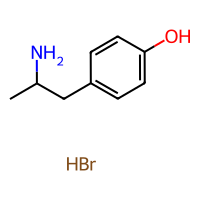
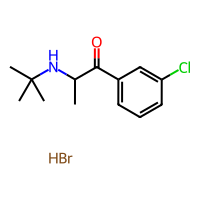

In [60]:
df.head(2)

In [61]:
benzene = Chem.MolFromSmiles("c1ccccc1")

RDKit provides an operator for performing substructure searches on pandas dataframes.
To use it, you do

```python

df["molecule"] >= molecule

```

where `df["molecule"]` contains RDKit molecule objects and molecule is an RDKit molecule object.

/Users/marzouk/miniconda3/envs/drugdesign/lib/python3.12/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES,Molecule
0,Br.CC(N)Cc1ccc(O)cc1,
1,Br.CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,
2,Br.CC1C2Cc3ccc(O)cc3C1(C)CCN2CCc1ccccc1,

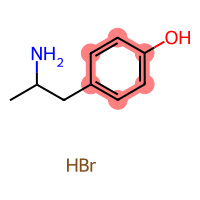
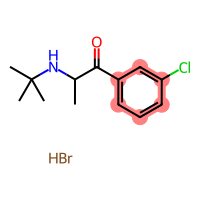
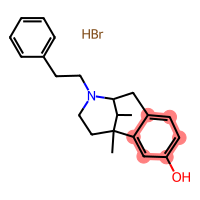

In [62]:
matches = df[df["Molecule"] >= benzene]
matches.head(3)

> Let's see how many molecules contain benzene?

In [63]:
matches.count()

SMILES      1404
Molecule    1404
dtype: int64

> **Important Note :**
* Fingerprint substructure searches are less exact than graph substructure searches, and are often used as a refining first step.

<a name="fingerprints_uniqueness"></a>
### 7.2 Are Fingerprints Unique?

* Despite the name "fingerprints" , molecular fingerprints are not unique to an individual molecule.
* Because of the way fingerprints are calculated, it is possible for two similar (but not identical) molecules to have the same molecular fingerprint.
* Molecular fingerprints are designed to capture specific structural features or patterns within a molecule and represent them in a compact and computationally efficient manner.
* The concept of uniqueness is more closely associated with individual molecular structures, and it's not a characteristic typically attributed to molecular fingerprints. 
* In a chemical context, molecules with distinct structures can have similar fingerprints, especially if they share common substructures or features.



> Let's investigate this !! 
* Does our dataset produce all unique Morgan fingerprints?

In [64]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator()

In [65]:
# Get morgan fingerprint column - store as binary for each fingerprint
df["morgan_fingerprints"] = df["Molecule"].apply(lambda x : fpgen.GetFingerprint(x).ToBinary() )

In [66]:
df["morgan_fingerprints"].unique()

array([b'\xe0\xff\xff\xff\x00\x08\x00\x00\x1b\x00\x00\x00\x02\x9a\x00Y\x00f4\x01\x02l\xf4>\x10(b \x91\x00"vjl\xac\x84u\x01*\xfa\x06.\xbc\xb9\x00',
       b'\xe0\xff\xff\xff\x00\x08\x00\x00)\x00\x00\x00\x02hv@"d\x84Zp\n\xa1\x00<\x14V\x04\xbc>:\x86ppb"<~:\xd0\xb8\x08\xba\x88\x94v@B,\xa8\x1cV\x86H2',
       b'\xe0\xff\xff\xff\x00\x08\x00\x00@\x00\x00\x00@^F|fU\x00\x0eD\x15\x00(\x00Nb\n\x88\x0c0:\x86d\x10\x9e\x06\x04&\x04\x16\x04\n\x14\x14p\x04\x1aH@\x06\x0c<  \x00\x06\x1ah\xb4\x10\xc6*\x0e\x1e|x\x06Vv\x1c\x14|\n4\x08H\x1e\x12',
       ...,
       b'\xe0\xff\xff\xff\x00\x08\x00\x000\x00\x00\x00:d\x0e2\x08(\xf8\x0c\x0e0,\x00D\xde%\x032\xba6L2\x882H\x0c(&V\x80 .\x0e\x16\x14@\xccpBvF6$@8x\x06\x02r\x96D',
       b'\xe0\xff\xff\xff\x00\x08\x00\x00/\x00\x00\x00\xa0\x86TD4\xb2^\n\xc6XT\x04\x14&nj\x12"Y\x00\x10\x06\x08\x10\x1a\x8a>H\x9c>\x94\x02$:l\x024~\x0c\xb8\x16p\x08D\x86\xf4V\xfc\x06',
       b'\xe0\xff\xff\xff\x00\x08\x00\x005\x00\x00\x00\x94\n\x84\xdeP\x12\x868B\x0c\x16\r\x01\xa2\nN\xb4\nH\

&nbsp;

<a name="resources"></a>
## Key Resources Utilized in Crafting This Notebook :
--------------------------
- Codes and examples in this notebook based heavily on [practical_cheminformatics_tutorials](https://github.com/PatWalters/practical_cheminformatics_tutorials) and [lab-7-cheminformatics](https://github.com/chem-274-A-master/lab-7-cheminformatics/tree/main) by [Patrick Walters](https://github.com/PatWalters), and [Jessica A. Nash](https://github.com/janash) respectively. 
- You can read more about SMILES at [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html)
- The [Daylight SMILES Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html) is another essential reference. 
- The canonical reference for SMARTS is the [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/)
- The [Daylight SMARTS Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html) is another essential reference. 
- For a bit more information on the history around SMILES, read this article from [Chemistry World](https://www.chemistryworld.com/opinion/weiningers-smiles/4014639.article).
- For more details about SMARTS, the [Daylight SMILES Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html) is a great resource. 
- A comprehensive course with various resources available for reading at any time about[ cheminformatics.](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics)